In [1]:
import pandas as pd

In [175]:
# Load the data into a DataFrame 
df_orig = pd.read_csv('mock_fashion_data_uk_us.csv')
df = pd.read_csv('mock_fashion_data_uk_us.csv')

In [7]:
df.dtypes

Product Name                     object
Price                           float64
Brand                            object
Category                         object
Description                      object
Rating                          float64
Review Count                      int64
Style Attributes                 object
Total Sizes                      object
Available Sizes                  object
Color                            object
Purchase History                 object
Age                               int64
Fashion Magazines                object
Fashion Influencers              object
Season                           object
Time Period Highest Purchase     object
Customer Reviews                 object
Social Media Comments            object
feedback                         object
dtype: object

In [20]:
print(df['Description'].unique())
print(df['Style Attributes'].unique())
print(df['Season'].unique())

['Bad' 'Not Good' 'Very Bad' 'Very Good' 'Best' 'Good' 'Worst']
['Streetwear' 'Vintage' 'Formal' 'Sporty' 'Edgy' 'Minimalist' 'Preppy'
 'Glamorous' 'Casual' 'Bohemian']
['Fall/Winter' 'Winter' 'Summer' 'Spring' 'Spring/Summer' 'Fall']


In [22]:
# Define the columns to drop
columns_to_drop = ['Social Media Comments', 'Fashion Influencers', 'Fashion Magazines', 'feedback', 'Product Name']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

df

KeyError: "['Social Media Comments', 'Fashion Influencers', 'Fashion Magazines', 'feedback', 'Product Name'] not found in axis"

In [23]:
# Drop all NaN values if any
df.dropna(inplace=True)

In [24]:
# Check if any NaN values are still present
df.isnull().sum()

Price                           0
Brand                           0
Category                        0
Description                     0
Rating                          0
Review Count                    0
Style Attributes                0
Total Sizes                     0
Available Sizes                 0
Color                           0
Purchase History                0
Age                             0
Season                          0
Time Period Highest Purchase    0
Customer Reviews                0
dtype: int64

In [25]:
print(df['Description'].unique())
print(df['Style Attributes'].unique())
print(df['Season'].unique())

['Bad' 'Not Good' 'Very Bad' 'Very Good' 'Best' 'Good' 'Worst']
['Streetwear' 'Vintage' 'Formal' 'Sporty' 'Edgy' 'Minimalist' 'Preppy'
 'Glamorous' 'Casual' 'Bohemian']
['Fall/Winter' 'Winter' 'Summer' 'Spring' 'Spring/Summer' 'Fall']


In [33]:
# Normalizing the rating column
df['Rating'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min()) * 5

In [59]:
df_spring = df[df.Season == 'Spring'].reset_index()

In [61]:
df_spring.drop(columns=['Season'], inplace=True)

In [90]:
# One-Hot encoding for categorial variables 
columns_to_encode = ['Description', 'Total Sizes', 'Available Sizes','Brand', 'Category', 'Color', 'Purchase History', 'Time Period Highest Purchase', 'Customer Reviews']
# Perform one-hot encoding using pd.get_dummies
df_spring_1 = pd.get_dummies(df_spring, columns=columns_to_encode)

# Encode the Stye Attributes to integer label, like 0, 1, 2, 3 ...
style_encode = {
    'Sporty': 0, 
    'Streetwear': 1, 
    'Bohemian': 2, 
    'Minimalist': 3, 
    'Formal': 4,
    'Glamorous': 5, 
    'Casual':6, 
    'Edgy': 7, 
    'Preppy': 8, 
    'Vintage': 9}

df_spring_1['Style Attributes'] = df_spring_1['Style Attributes'].apply(lambda x: style_encode.get(x))


In [92]:
df_spring_1['Style Attributes'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [66]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split

In [93]:
# Get the x and y of the data
data_x = df_spring_1.drop(['Style Attributes'], axis=1)
data_y = df_spring_1['Style Attributes']

# Split the data to train and test dataset 
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [94]:
data_y.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [143]:
# Build the model
params = {
    'n_estimators': 800,
    'learning_rate': 1e-1,
    'max_depth': 8,
    'num_class': 10,
    'random_state': 42,
    'nthread': 8,
    # 'silent': 2
    }

# eval_set = [(x_train, y_train), (x_test, y_test)]
eval_set = [(x_train, y_train)]
xgboost_clf = XGBClassifier(n_estimators=800, learning_rate=0.1, max_depth=8, num_class=10, object='multi:softmax',
                            random_state=42, nthread=8)

In [144]:
xgboost_clf.fit(x_train, y_train, eval_set=[(x_train, y_train)], verbose=True)

/home/usr/data1/anaconda3/envs/lgb-gpu/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/usr/data1/anaconda3/envs/lgb-gpu/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/usr/data1/anaconda3/envs/lgb-gpu/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/usr/data1/anaconda3/envs/lgb-gpu/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categor

[21:57:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1700181168148/work/src/learner.cc:767: 
Parameters: { "object" } are not used.

[0]	validation_0-mlogloss:2.29943
[1]	validation_0-mlogloss:2.29684
[2]	validation_0-mlogloss:2.29429
[3]	validation_0-mlogloss:2.29186
[4]	validation_0-mlogloss:2.28922
[5]	validation_0-mlogloss:2.28690
[6]	validation_0-mlogloss:2.28459
[7]	validation_0-mlogloss:2.28248
[8]	validation_0-mlogloss:2.28006
[9]	validation_0-mlogloss:2.27770
[10]	validation_0-mlogloss:2.27526
[11]	validation_0-mlogloss:2.27308
[12]	validation_0-mlogloss:2.27096
[13]	validation_0-mlogloss:2.26878
[14]	validation_0-mlogloss:2.26648
[15]	validation_0-mlogloss:2.26413
[16]	validation_0-mlogloss:2.26188
[17]	validation_0-mlogloss:2.26041
[18]	validation_0-mlogloss:2.25828
[19]	validation_0-mlogloss:2.25602
[20]	validation_0-mlogloss:2.25425
[21]	validation_0-mlogloss:2.25215
[22]	validation_0-mlogloss:2.25007
[23]	validation_0-mlogloss:2.24842
[24]	validati

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, nthread=8, num_class=10,
              num_parallel_tree=None, ...)

In [148]:
y_pred = xgboost_clf.predict(x_train)
y_pred[:50]

/home/usr/data1/anaconda3/envs/lgb-gpu/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/usr/data1/anaconda3/envs/lgb-gpu/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/usr/data1/anaconda3/envs/lgb-gpu/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/usr/data1/anaconda3/envs/lgb-gpu/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categor

array([3, 4, 4, 4, 8, 1, 1, 9, 3, 2, 1, 4, 4, 4, 4, 4, 9, 9, 2, 5, 9, 4,
       0, 7, 3, 1, 9, 0, 0, 8, 8, 9, 2, 9, 3, 1, 1, 0, 4, 4, 0, 9, 5, 3,
       1, 7, 7, 0, 9, 6])

In [149]:
print(y_train.tolist()[:50])

[3, 4, 4, 4, 8, 1, 1, 9, 3, 2, 1, 4, 4, 4, 9, 4, 8, 9, 2, 5, 9, 4, 0, 7, 3, 1, 9, 0, 0, 8, 8, 9, 2, 8, 8, 1, 1, 0, 4, 4, 0, 9, 5, 3, 1, 7, 7, 0, 9, 6]


In [154]:
import numpy as np
num_correct = np.sum(y_pred == y_train.tolist())
print("The percentage of correct prediction: ", num_correct / len(y_pred))

The percentage of correct prediction:  0.8944480575302939


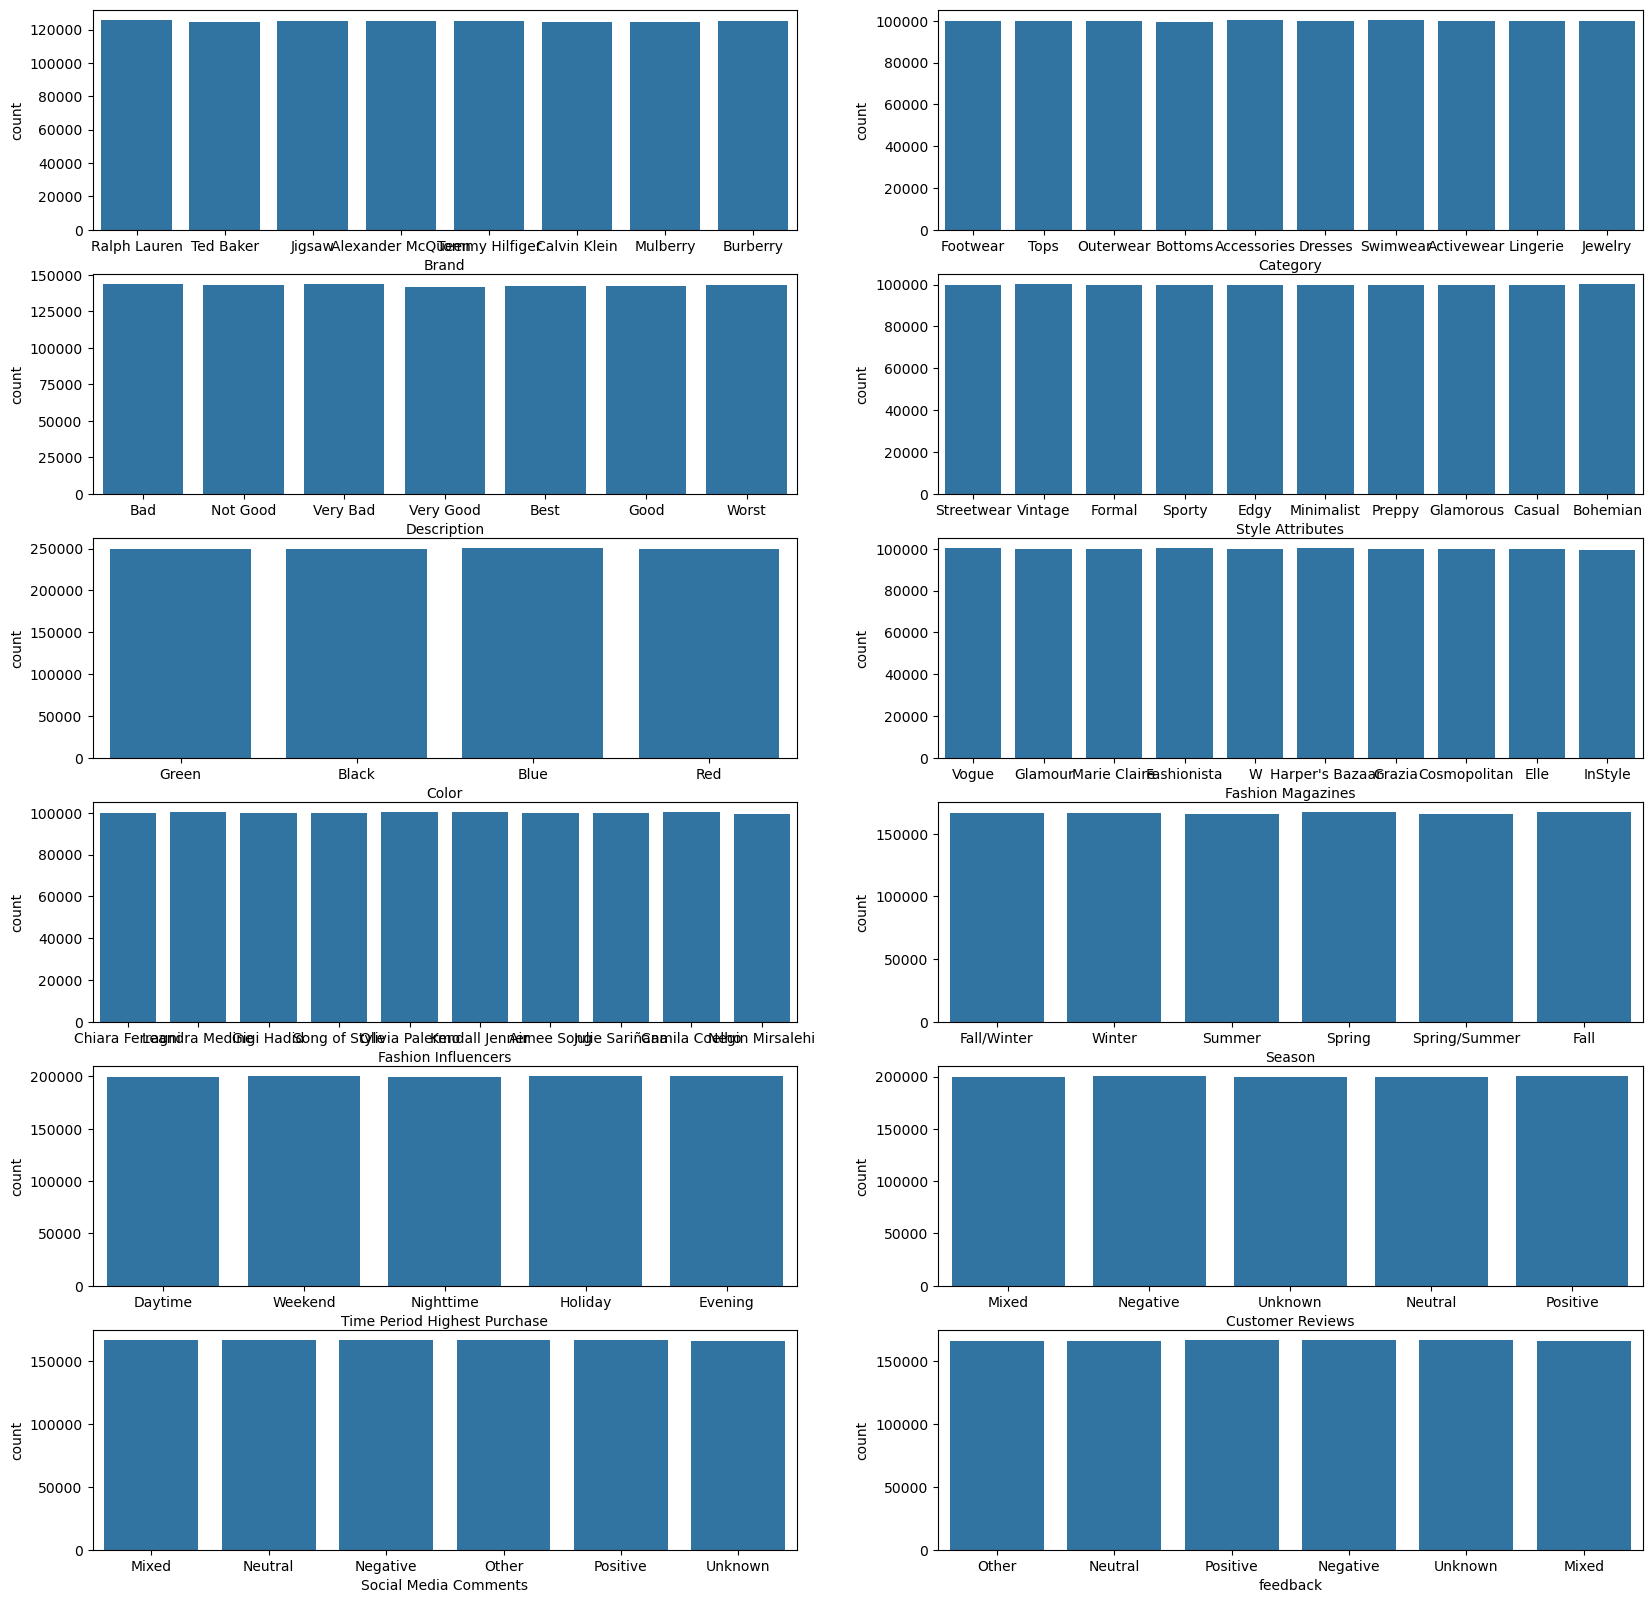

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols=['Brand','Category','Description','Style Attributes','Color',
           'Fashion Magazines','Fashion Influencers','Season','Time Period Highest Purchase',
           'Customer Reviews','Social Media Comments','feedback']

# countplot of each categorical column
fig, axis = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))

index = 0
for row in range(6):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1
        
plt.show()

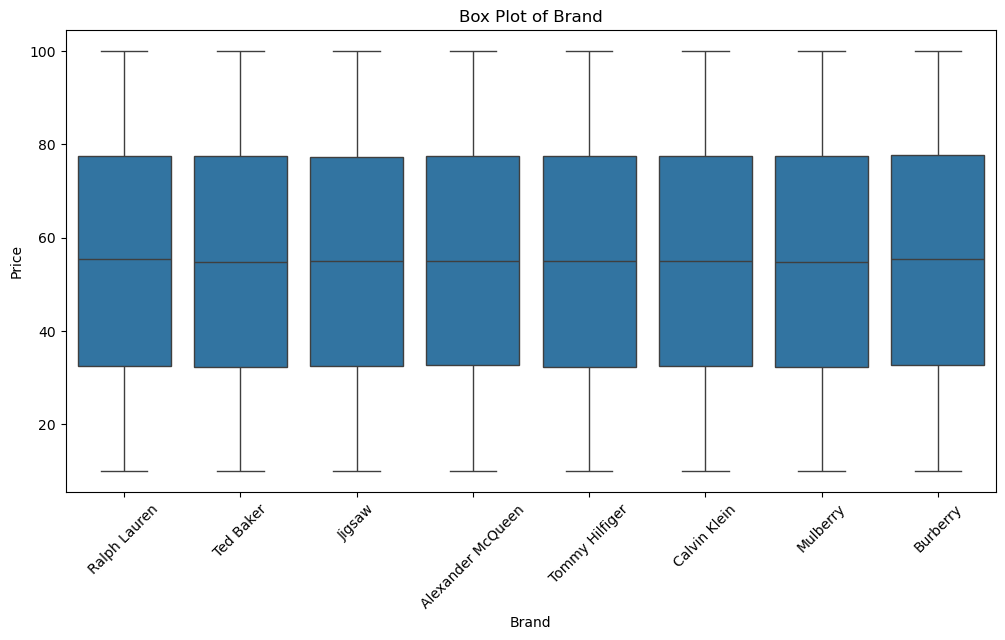

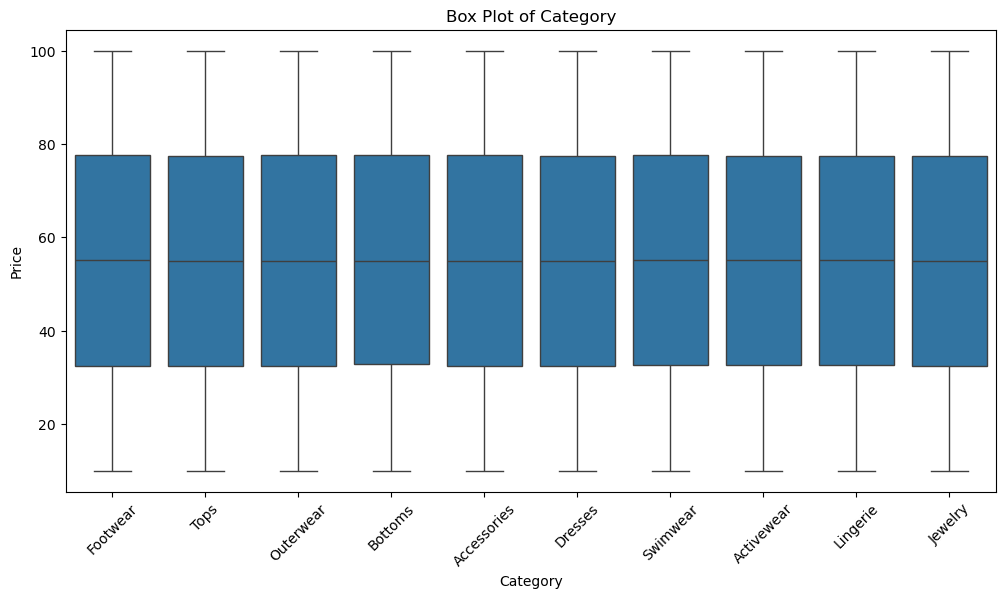

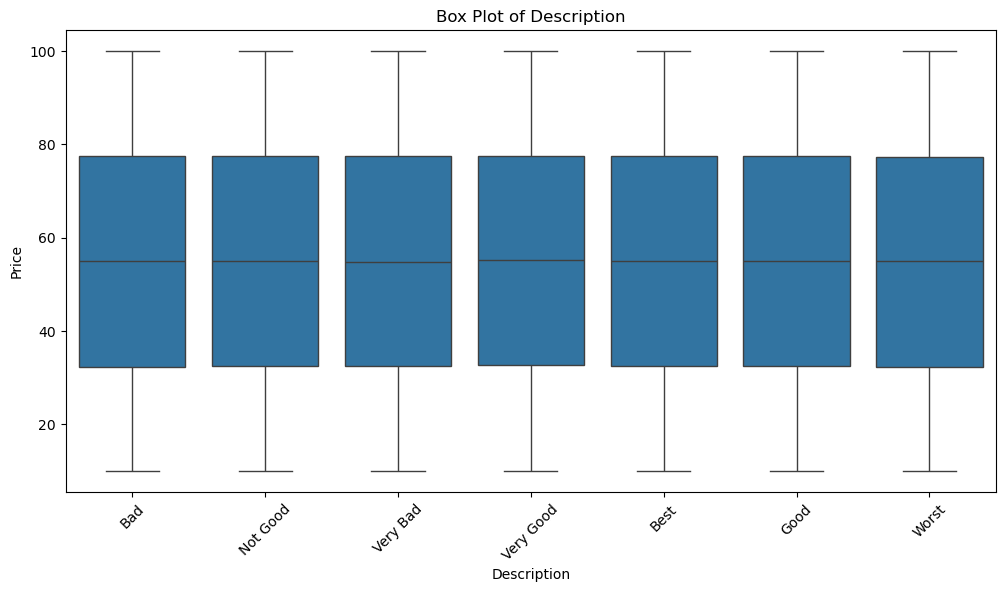

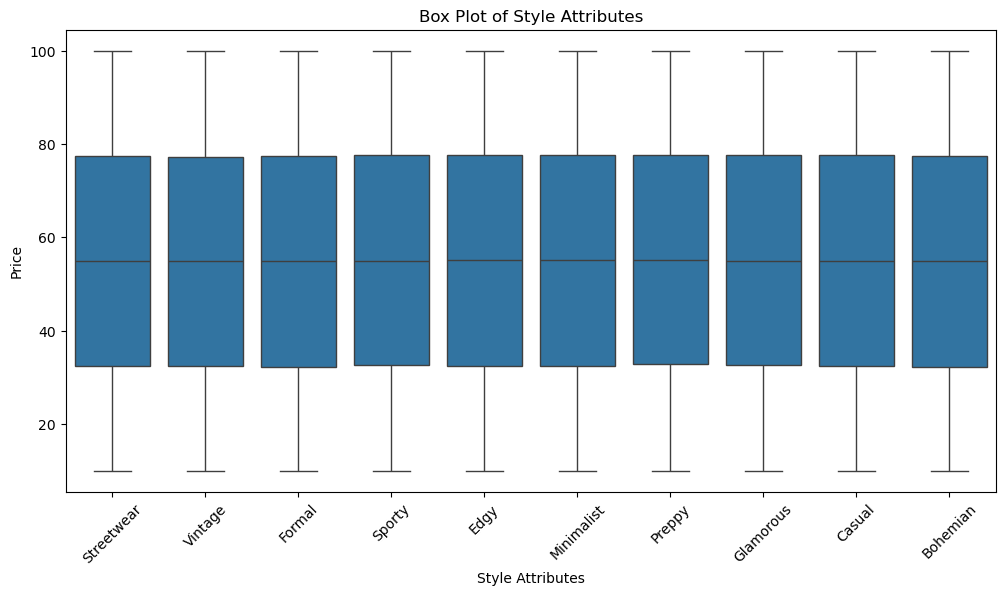

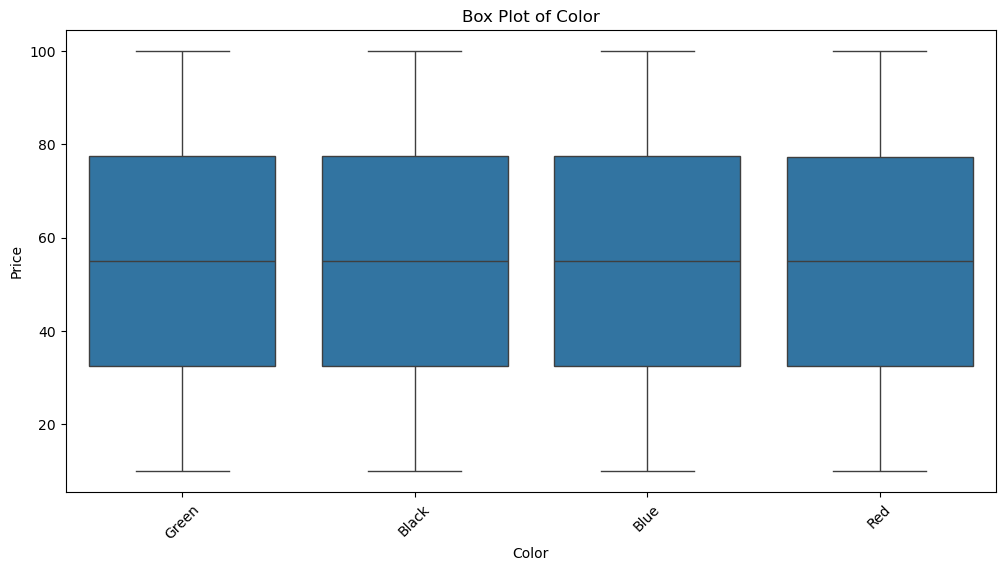

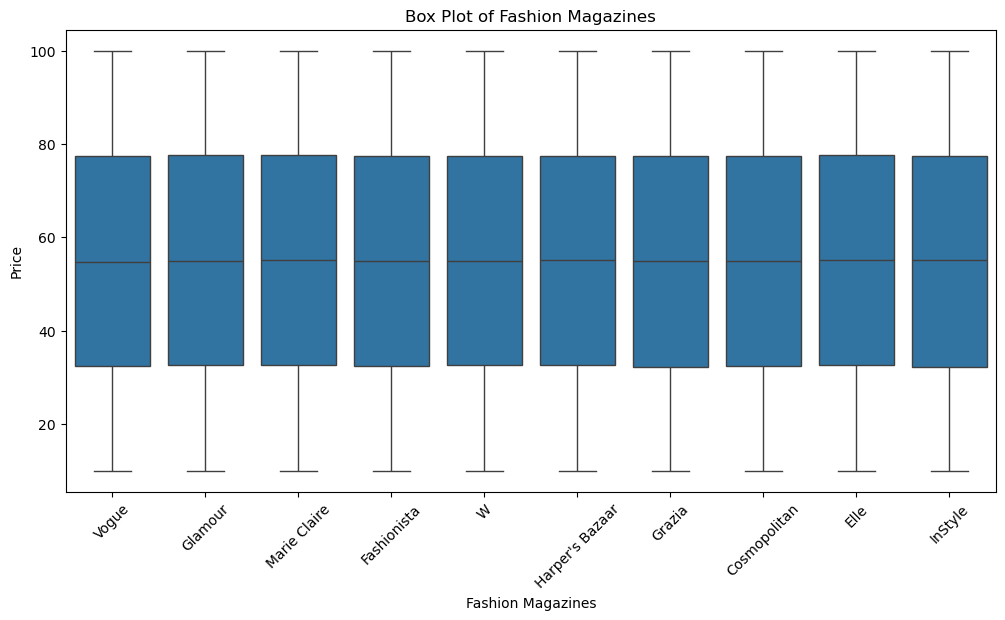

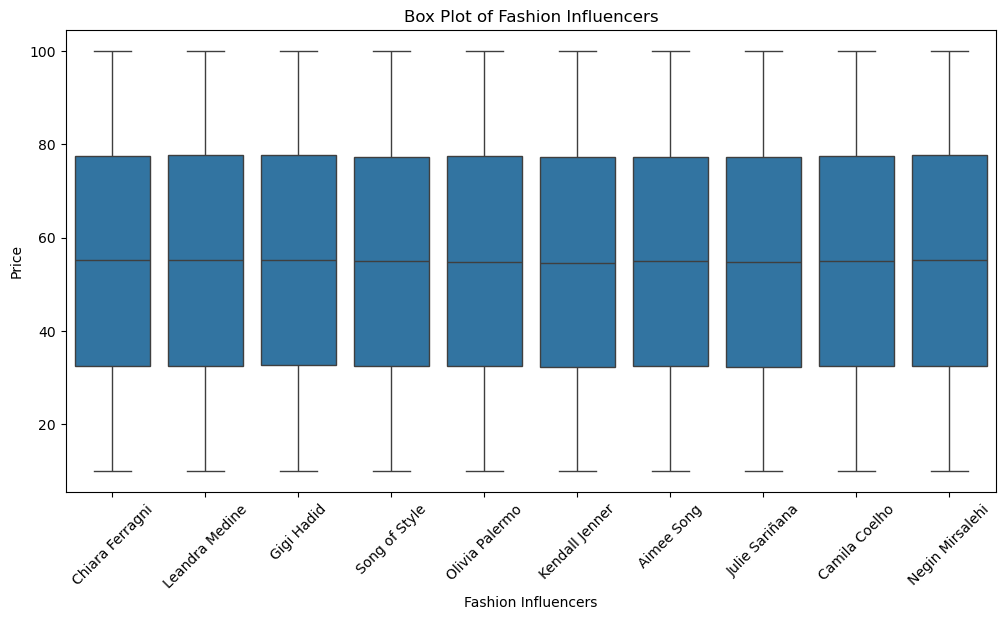

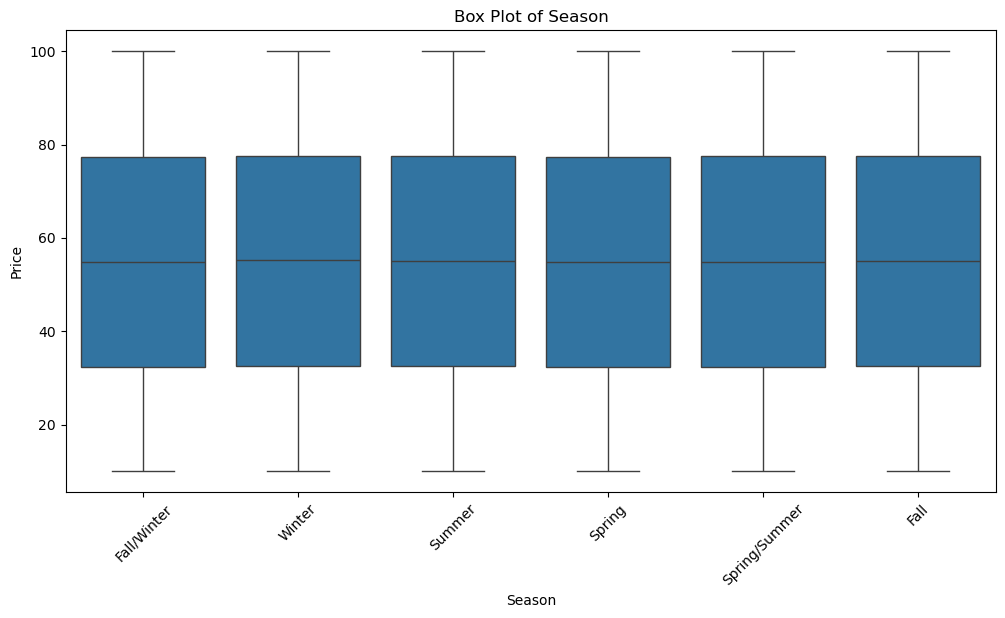

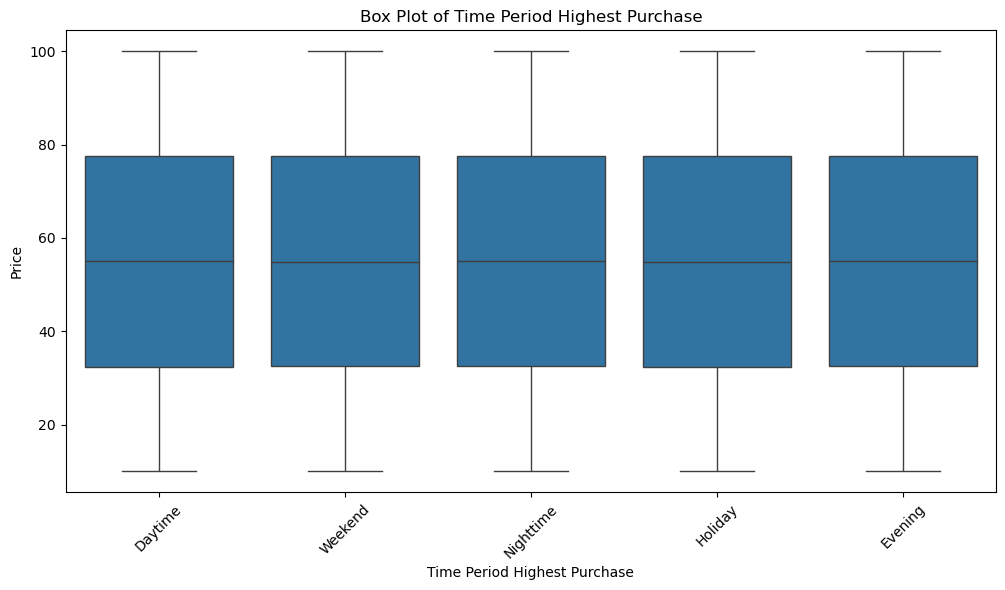

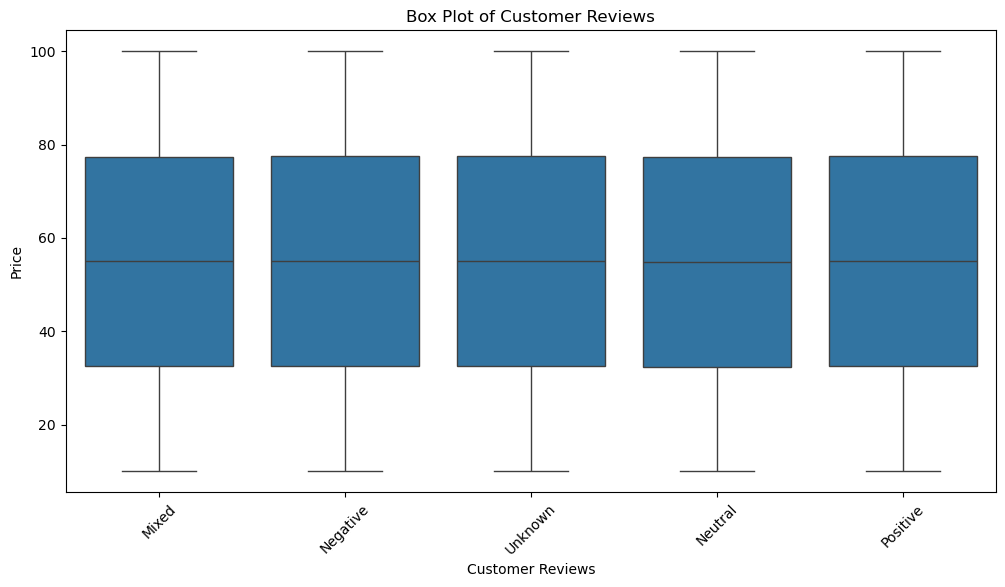

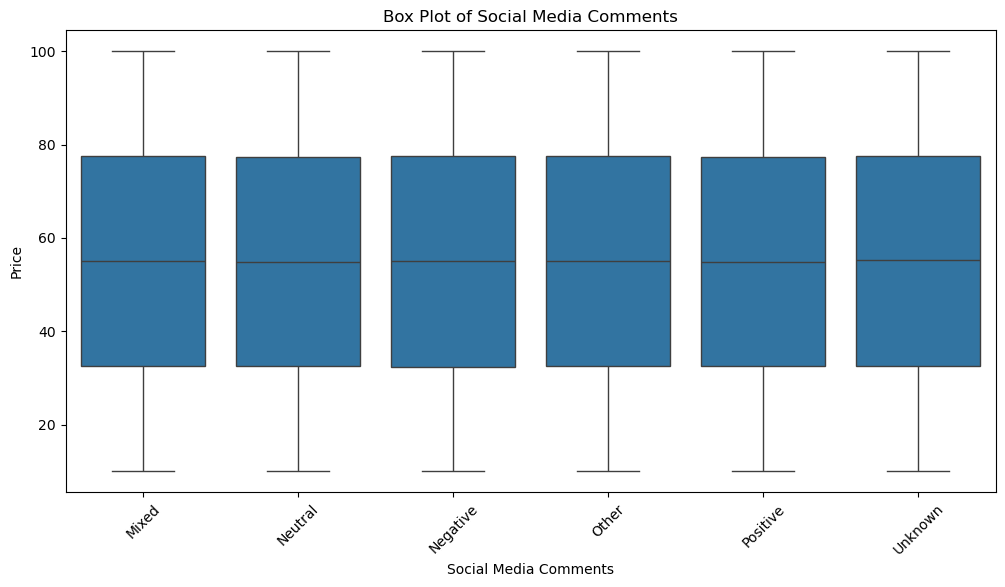

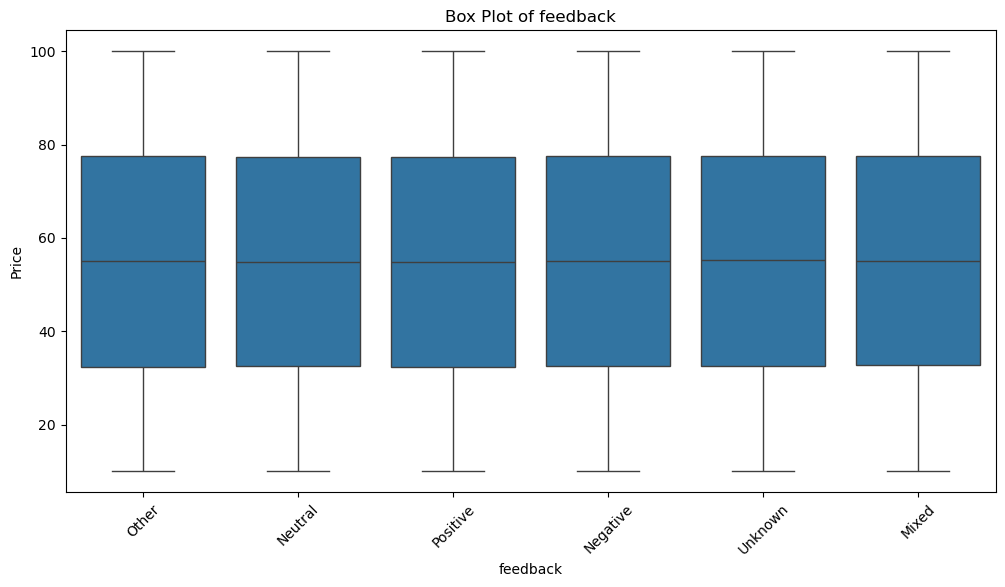

In [178]:
for col in cat_cols:
    plt.figure(figsize=(12, 6))  # Set the figure size
    sns.boxplot(data=df, x=col, y='Price')  # 'Value' represents the numerical column you want to plot against
    plt.title(f'Box Plot of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

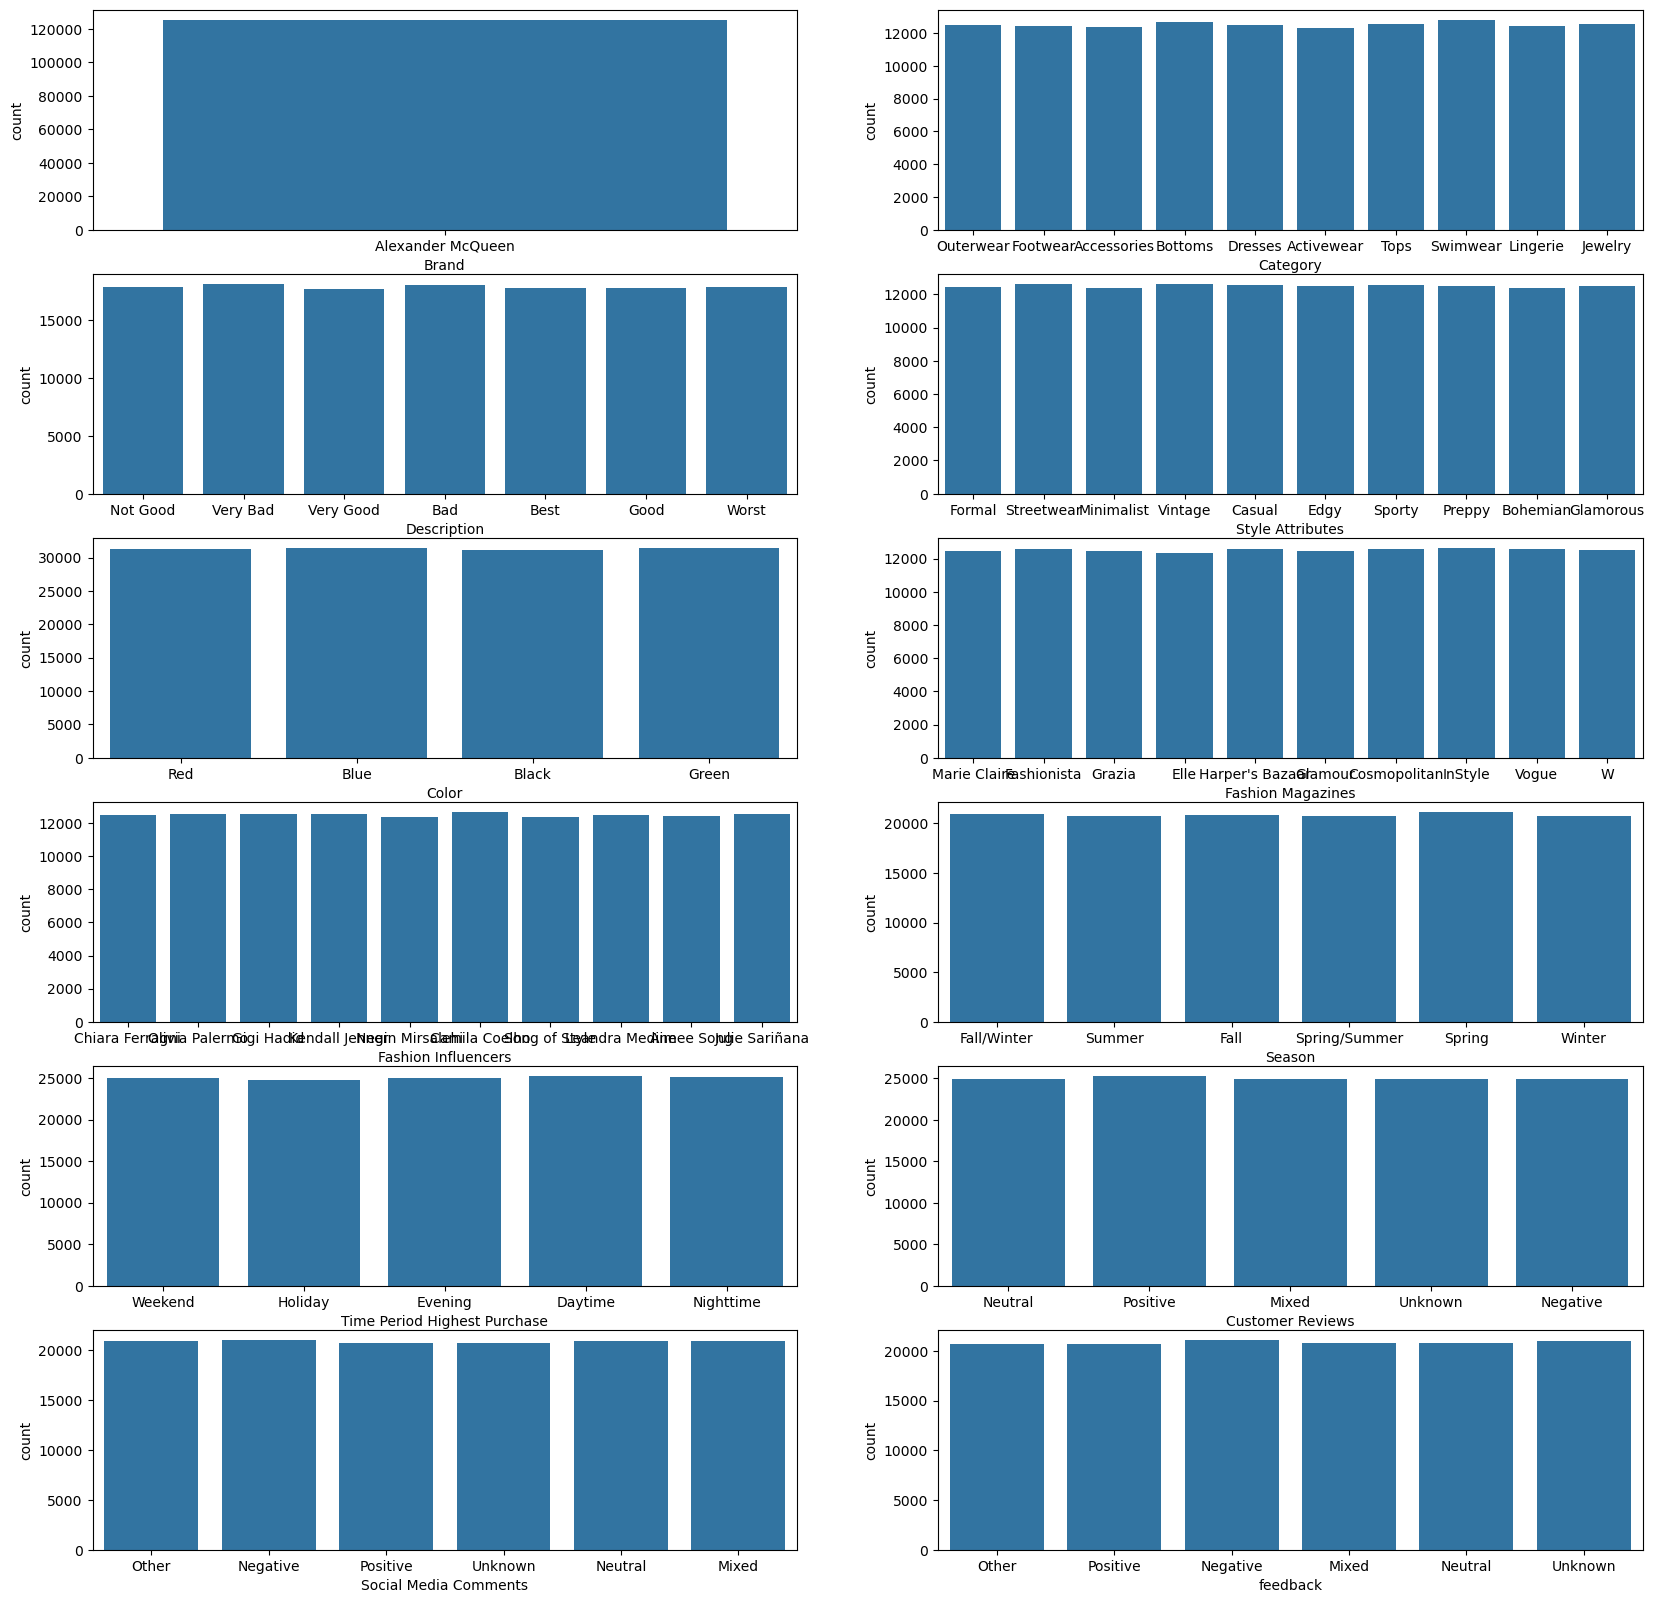

In [180]:
Alexander_McQueen_df = df[df['Brand'] == 'Alexander McQueen']
# countplot of each categorical column
fig, axis = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))

index = 0
for row in range(6):
    for col in range(2):
        sns.countplot(data=Alexander_McQueen_df, x=cat_cols[index], ax=axis[row, col])
        index += 1
        
plt.show()